In [36]:
import pandas as pd
tlp="/Volumes/PortableSSD/projects/EnvelopProtein/dm_src/{}" # dm_src ann_li
df = pd.read_csv(tlp.format("env_info.csv"))
famdf = pd.read_json(tlp.format("env_pfam.json"),lines=True)
famdf["E-value"] = famdf["E-value"].astype("float")
famdf = famdf[famdf["E-value"]<1.0e-07]
famdf = famdf[["query name","accession", "target name"]]
famdf.rename(columns={"query name":"id"},inplace=True)
alldf = df.merge(famdf,on="id")
alldf[alldf["family"]=="Rhabdoviridae"]["target name"].value_counts() 
# Paramyxoviridae Rhabdoviridae Orthomyxoviridae Orthoherpesviridae Coronaviridae Baculoviridae Togaviridae Arenaviridae
# alldf["family"].value_counts()


Rhabdo_glycop    50
Name: target name, dtype: int64

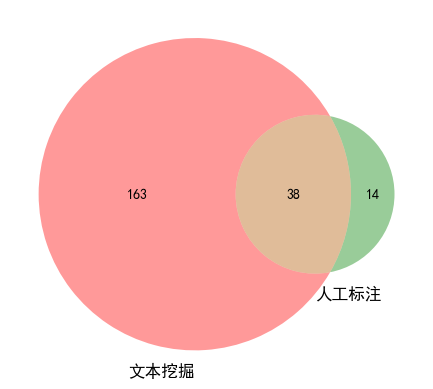

In [65]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from pylab import mpl
# 设置显示中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]
tlp="/Volumes/PortableSSD/projects/EnvelopProtein/{}"
df_dm = pd.read_csv(tlp.format("llm_fusion/papers_ner_taxid.csv"))
# df_dm = pd.read_csv(tlp.format("dm_src/env_info.csv"))
df_anno = pd.read_csv(tlp.format("nc_zf/env_info.csv"))
df_dm["species"] = df_dm["family"]+" " + df_dm["species"]
df_anno["species"] = df_anno["family"]+" " + df_anno["species"]

field = "species"  # family species
s1 = set(df_dm[field].dropna().drop_duplicates().values)
s2 = set(df_anno[field].dropna().drop_duplicates().values)
venn2(subsets = [s1, s2], set_labels = ('文本挖掘', '人工标注'));

In [18]:
from Bio import SeqIO
from Bio import Align
import numpy as np
from matplotlib_venn import venn2
from pylab import mpl
# 设置显示中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]
aligner = Align.PairwiseAligner()
tlp = "/Volumes/PortableSSD/projects/EnvelopProtein/{}/env.fasta"
nczf, dmsrc = [], []
zfids = []
for seq_record in SeqIO.parse(tlp.format("nc_zf"), "fasta"):
    nczf.append(seq_record.seq)
    zfids.append(seq_record.id)
for seq_record in SeqIO.parse(tlp.format("dm_src"), "fasta"):
    dmsrc.append((seq_record.seq))

def indentify(seq1, seq2):
    alignments = aligner.align(seq1, seq2)
    return alignments[0].score / max(len(seq1), len(seq2)) * 100

matrix = np.zeros((len(nczf), len(dmsrc)))
for i, seq in enumerate(nczf):
    matrix[i,:]=[ indentify(seq, s) for s in dmsrc]

zf_sim = np.max(matrix, axis=1)
dm_sim = np.max(matrix, axis=0)
dm_uniq = np.sum(dm_sim<30)
zf_uniq= np.sum(zf_sim<30)
common = len(zf_sim)-zf_uniq
venn2(subsets = (dm_uniq,zf_uniq,common), set_labels = ('文本挖掘', '人工标注'))





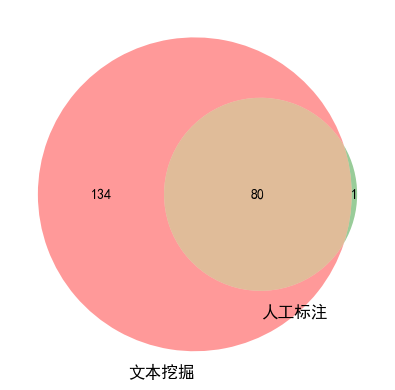

In [66]:
zf_sim = np.max(matrix, axis=1)
dm_sim = np.max(matrix, axis=0)
dm_uniq = np.sum(dm_sim<30)
zf_uniq= np.sum(zf_sim<30)
common = len(zf_sim)-zf_uniq
venn2(subsets = (dm_uniq,zf_uniq,common), set_labels = ('文本挖掘', '人工标注'))

In [57]:
import seaborn as sns
from pylab import mpl
# 设置显示中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]
data = np.max(matrix, axis=1)
bar = {}
for s in data:
    bar[int(s/10)*10] = bar.get(int(s/10)*10,0)+1
plots =  sorted(bar.items(), key=lambda x:x[0])
x,y = zip(*plots)
# plt.figure(dpi=150)
# sns.barplot(x=list(x),y=list(y))
missing = []
for i, v in enumerate(data):
    if v<30:
        missing.append(zfids[i])
missing


['tr|B6UST6|B6UST6_9HEPC']

In [2]:
import os
tlp="/Volumes/PortableSSD/projects/EnvelopProtein/dm_final/{}"
src, trg = tlp.format("env.fasta"),tlp.format("env_cdhit.txt")
hmm="/Volumes/PortableSSD/data/uniclust/align/db/pfam_a.hmm"
# cmd=f"cd-hit -i {src} -o {trg} -c 0.9 -T 2 -n 5"
cmd=f"cd-hit -i {src} -o {trg} -c 0.5 -T 2 -n 3"
print(cmd)
res=os.popen(cmd)
print(res.read())

cd-hit -i /Volumes/PortableSSD/projects/EnvelopProtein/dm_final/env.fasta -o /Volumes/PortableSSD/projects/EnvelopProtein/dm_final/env_cdhit.txt -c 0.5 -T 2 -n 3
Program: CD-HIT, V4.8.1, May 15 2023, 22:26:50
Command: cd-hit -i
         /Volumes/PortableSSD/projects/EnvelopProtein/dm_final/env.fasta
         -o
         /Volumes/PortableSSD/projects/EnvelopProtein/dm_final/env_cdhit.txt
         -c 0.5 -T 2 -n 3

Started: Sat Mar 23 23:02:42 2024
                            Output                              
----------------------------------------------------------------
Option -T is ignored: multi-threading with OpenMP is NOT enabled!
total seq: 58264
longest and shortest : 21436 and 15
Total letters: 45875759
Sequences have been sorted

Approximated minimal memory consumption:
Sequence        : 53M
Buffer          : 1 X 21M = 21M
Table           : 1 X 1M = 1M
Miscellaneous   : 0M
Total           : 76M

Table limit with the given memory limit:
Max number of representatives: 722652


[Text(0.25, 0, 'ID>=40%'), Text(1.25, 0, 'ID>=90%')]

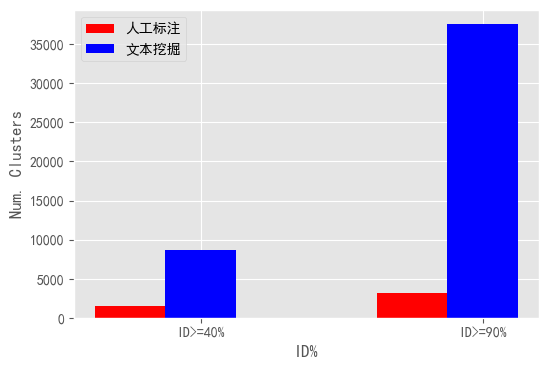

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from pylab import mpl
# 设置显示中文字体
mpl.rcParams["font.sans-serif"] = ["SimHei"]

%matplotlib inline

plt.style.use("ggplot")

identities = ["ID>=40%", "ID>=90%"]
method_human = [1484, 3142]
method_machine = [8642, 37552]

# 创建分组柱状图，需要自己控制x轴坐标
xticks = np.arange(len(identities))
fig, ax = plt.subplots(figsize=(6, 4))
ax.bar(xticks, method_human, width=0.25, label="人工标注", color="red")
ax.bar(xticks + 0.25, method_machine, width=0.25, label="文本挖掘", color="blue")

# ax.set_title("Grouped Bar plot", fontsize=15)
ax.set_xlabel("ID%")
ax.set_ylabel("Num. Clusters")
ax.legend()

# 最后调整x轴标签的位置
ax.set_xticks(xticks + 0.25)
ax.set_xticklabels(identities)

In [14]:
alldf

,id,Title,family,species,taxonomy,accession,target name
0,AHV82114.1,"Duck picornavirus GL/12, complete genome",Picornaviridae,Aalivirus,"['Viruses', 'Riboviria', 'Orthornavirae', 'Pis...",-,RdRP_1
1,AHV82114.1,"Duck picornavirus GL/12, complete genome",Picornaviridae,Aalivirus,"['Viruses', 'Riboviria', 'Orthornavirae', 'Pis...",-,RNA_helicase
2,AHV82114.1,"Duck picornavirus GL/12, complete genome",Picornaviridae,Aalivirus,"['Viruses', 'Riboviria', 'Orthornavirae', 'Pis...",-,Peptidase_C3
3,AHV82114.1,"Duck picornavirus GL/12, complete genome",Picornaviridae,Aalivirus,"['Viruses', 'Riboviria', 'Orthornavirae', 'Pis...",-,Rhv
4,AAC82569.1,"Abelson murine leukemia virus, complete genome",Retroviridae,Gammaretrovirus,"['Viruses', 'Riboviria', 'Pararnavirae', 'Artv...",-,PK_Tyr_Ser-Thr
...,...,...,...,...,...,...,...
20633,AAX87001.1,"Blackberry virus Y, complete genome",Potyviridae,Brambyvirus,"['Viruses', 'Riboviria', 'Orthornavirae', 'Pis...",-,Peptidase_C6
20634,AAX87001.1,"Blackberry virus Y, complete genome",Potyviridae,Brambyvirus,"['Viruses', 'Riboviria', 'Orthornavirae', 'Pis...",-,Peptidase_C4
20635,AAX87001.1,"Blackberry virus Y, complete genome",Potyviridae,Brambyvirus,"['Viruses', 'Riboviria', 'Orthornavirae', 'Pis...",-,Helicase_C
20636,ASJ82196.1,Bombali virus isolate Bombali virus/M.condylur...,Filoviridae,Orthoebolavirus,"['Viruses', 'Riboviria', 'Orthornavirae', 'Neg...",-,Filo_glycop


In [10]:
import pandas as pd
tlp = "/Volumes/PortableSSD/projects/EnvelopProtein/ann_li/{}"
df = pd.read_csv(tlp.format("env.csv"))
pids = df[df["taxid"].isna()]["id"].values
print(len(pids))

1497


In [16]:
df_anno["species"].value_counts()

Enterovirus                     397
Lentivirus                      247
Hepacivirus                     192
Orthobunyavirus                 188
Betacoronavirus                 184
                               ... 
Harbor seal picornavirus          1
Harbour porpoise rhabdovirus      1
Hardyhead chuvirus                1
Harlingen virus                   1
Rhizomonavirus                    1
Name: species, Length: 824, dtype: int64